In [1]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import gaussian_kde
import contextily as ctx

C:\Users\dune\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## read data

od data in OA level

In [2]:
# read feather data
df = pd.read_feather('data/2021-10_odt.feather')

In [3]:
df

,index,oaid_origin,oaid_des,start_time,end_time
0,0,E00000021,E00000007,2021-10-13 11:43:00,2021-10-13 12:07:00
1,0,E00174772,E00000007,2021-10-17 13:20:00,2021-10-17 13:39:00
2,0,E00000024,E00000007,2021-10-14 08:04:00,2021-10-14 08:05:00
3,0,E00000024,E00000007,2021-10-19 08:32:00,2021-10-19 08:48:00
4,0,E00017723,E00000007,2021-10-19 06:59:00,2021-10-19 07:53:00
...,...,...,...,...,...
3138526,4834,E00176525,E00008169,2021-10-20 07:33:00,2021-10-20 07:40:00
3138527,4834,E00008167,E00008169,2021-10-13 08:58:00,2021-10-13 08:59:00
3138528,4834,E00008167,E00008169,2021-10-22 21:04:00,2021-10-22 21:05:00
3138529,4834,E00008149,E00008169,2021-10-24 16:42:00,2021-10-24 17:46:00


In [3]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['duration(mins)'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

In [4]:
# add day of week
df['day_of_week'] = df['start_time'].dt.day_name()
# delete duration = 0
df = df[df['duration(mins)'] > 0]
df

,index,oaid_origin,oaid_des,start_time,end_time,duration(mins),day_of_week
0,0,E00000021,E00000007,2021-10-13 11:43:00,2021-10-13 12:07:00,24.0,Wednesday
1,0,E00174772,E00000007,2021-10-17 13:20:00,2021-10-17 13:39:00,19.0,Sunday
2,0,E00000024,E00000007,2021-10-14 08:04:00,2021-10-14 08:05:00,1.0,Thursday
3,0,E00000024,E00000007,2021-10-19 08:32:00,2021-10-19 08:48:00,16.0,Tuesday
4,0,E00017723,E00000007,2021-10-19 06:59:00,2021-10-19 07:53:00,54.0,Tuesday
...,...,...,...,...,...,...,...
3138526,4834,E00176525,E00008169,2021-10-20 07:33:00,2021-10-20 07:40:00,7.0,Wednesday
3138527,4834,E00008167,E00008169,2021-10-13 08:58:00,2021-10-13 08:59:00,1.0,Wednesday
3138528,4834,E00008167,E00008169,2021-10-22 21:04:00,2021-10-22 21:05:00,1.0,Friday
3138529,4834,E00008149,E00008169,2021-10-24 16:42:00,2021-10-24 17:46:00,64.0,Sunday


In [32]:
df2 = pd.read_csv('data/msoa_ODs_Time/msoa_ODs_Time.csv')


In [33]:
df2

,o_msoa,d_msoa,start_time,end_time
0,E02005081,E02005161,2021-11-18 17:11:46,2021-11-18 17:33:27
1,E02005161,E02005081,2021-11-18 18:25:55,2021-11-18 18:46:13
2,E02005081,E02005165,2021-11-19 08:28:32,2021-11-19 08:42:28
3,E02005165,E02005081,2021-11-19 16:46:58,2021-11-19 16:57:13
4,E02005075,E02005081,2021-11-19 23:21:07,2021-11-19 23:28:48
...,...,...,...,...
55776428,E02005379,E02005379,2021-11-04 10:00:35,2021-11-04 10:33:12
55776429,E02006972,E02006972,2021-11-28 14:31:03,2021-11-28 14:37:02
55776430,E02003871,E02003871,2021-11-04 15:51:17,2021-11-04 15:51:17
55776431,E02003872,E02003872,2021-11-30 08:50:09,2021-11-30 08:50:54


In [34]:
# convert csv to feather
df2.to_feather('data/msoa_ODs_Time/msoa_ODs_Time.feather')

administritive boundary data 

In [5]:
oa_london = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/OA_2011_London_gen_MHW.shp")
oa_london = oa_london.to_crs(epsg=27700)

ward_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/London_Ward.shp")
ward_shp = ward_shp.to_crs(epsg=27700)

borough_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
borough_shp = borough_shp.to_crs(epsg=27700)

msoa_shp = gpd.read_file("data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp")
msoa_shp = msoa_shp.to_crs(epsg=27700)


In [36]:
oa_london_df = pd.DataFrame(oa_london)

# merge the oa_london_df with the df, use oaid_origin in df and OA11CD in oa_london_df
df_merge = pd.merge(df, oa_london_df, left_on='oaid_origin', right_on='OA11CD', how='left')
df_merge = df_merge[['index', 'oaid_origin', 'oaid_des', 'LSOA11CD','MSOA11CD','geometry','start_time', 'end_time', 'duration(mins)','day_of_week']]
df_merge.rename(columns={'LSOA11CD':'LSOA11CD_origin', 'MSOA11CD':'MSOA11CD_origin','geometry':'geometry_origin'}, inplace=True)

df_merge_od = pd.merge(df_merge, oa_london_df, left_on='oaid_des', right_on='OA11CD', how='left')
df_merge_od = df_merge_od[['index', 'oaid_origin', 'oaid_des', 'LSOA11CD_origin','MSOA11CD_origin','geometry_origin','start_time', 'end_time', 'duration(mins)', 'LSOA11CD','MSOA11CD','geometry','day_of_week']]
df_merge_od.rename(columns={'LSOA11CD':'LSOA11CD_des', 'MSOA11CD':'MSOA11CD_des','geometry':'geometry_des'}, inplace=True)


In [37]:
df_origin = df_merge_od.drop(columns=['geometry_des'])
df_des = df_merge_od.drop(columns=['geometry_origin'])

In [38]:
df_origin.sample(5)

,index,oaid_origin,oaid_des,LSOA11CD_origin,MSOA11CD_origin,geometry_origin,start_time,end_time,duration(mins),LSOA11CD_des,MSOA11CD_des,day_of_week
1274645,2018,E00009939,E00010412,E01001979,E02000407,"POLYGON ((533759.521 190367.764, 533882.137 19...",2021-10-18 09:12:00,2021-10-18 09:40:00,28.0,E01002068,E02000421,Monday
2070999,3245,E00016259,E00016804,E01003218,E02000674,"POLYGON ((538670.940 172837.740, 538750.001 17...",2021-10-18 07:02:00,2021-10-18 07:11:00,9.0,E01003319,E02000670,Monday
828539,1157,E00005902,E00005903,E01001178,E02000208,"POLYGON ((531866.336 167338.878, 532021.500 16...",2021-10-19 08:49:00,2021-10-19 09:19:00,30.0,E01001176,E02000204,Tuesday
3092596,4813,E00012220,E00012493,E01002456,E02000510,"POLYGON ((507541.000 183260.000, 507620.744 18...",2021-10-19 13:22:00,2021-10-19 13:36:00,14.0,E01033725,E02000508,Tuesday
1972668,3045,E00015273,E00015721,E01003028,E02000636,"POLYGON ((529537.433 174085.417, 529585.000 17...",2021-10-22 06:50:00,2021-10-22 07:29:00,39.0,E01003113,E02000649,Friday


In [10]:
df_merge_od['oaid_origin'].nunique()

25038

In [11]:
df_merge_od['LSOA11CD_origin'].nunique()

4835

In [12]:
df_merge_od['MSOA11CD_origin'].nunique()

983

weekday data

In [54]:
df_origin_weekend = df_origin[df_origin['day_of_week'].isin(['Saturday', 'Sunday'])]
df_origin_weekend

,index,oaid_origin,oaid_des,LSOA11CD_origin,MSOA11CD_origin,geometry_origin,start_time,end_time,duration(mins),LSOA11CD_des,MSOA11CD_des,day_of_week
1,0,E00174772,E00000007,E01002704,E02000576,"POLYGON ((532759.871 182369.050, 532768.000 18...",2021-10-17 13:20:00,2021-10-17 13:39:00,19.0,E01000001,E02000001,Sunday
6,0,E00013455,E00000007,E01002704,E02000576,"POLYGON ((532568.000 182352.000, 532567.194 18...",2021-10-23 22:45:00,2021-10-24 09:58:00,673.0,E01000001,E02000001,Saturday
8,0,E00174784,E00000007,E01033489,E02000575,"POLYGON ((531895.000 182274.000, 531966.000 18...",2021-10-17 13:16:00,2021-10-17 13:28:00,12.0,E01000001,E02000001,Sunday
28,0,E00004198,E00000007,E01000851,E02000191,"POLYGON ((529472.903 181936.611, 529518.376 18...",2021-10-24 09:37:00,2021-10-24 15:20:00,343.0,E01000001,E02000001,Sunday
30,0,E00166632,E00000007,E01003935,E02000808,"POLYGON ((532329.563 180507.521, 532306.281 18...",2021-10-23 14:05:00,2021-10-23 14:30:00,25.0,E01000001,E02000001,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
3109368,4834,E00007874,E00008180,E01001586,E02000328,"POLYGON ((540173.519 177280.685, 540166.867 17...",2021-10-17 19:05:00,2021-10-17 19:25:00,20.0,E01033746,E02006931,Sunday
3109369,4834,E00008178,E00008180,E01033746,E02006931,"POLYGON ((538073.358 177007.835, 538175.060 17...",2021-10-17 14:28:00,2021-10-17 15:05:00,37.0,E01033746,E02006931,Sunday
3109375,4834,E00008295,E00008178,E01001662,E02006930,"POLYGON ((539550.084 177934.901, 539483.481 17...",2021-10-16 10:32:00,2021-10-16 10:45:00,13.0,E01033746,E02006931,Saturday
3109376,4834,E00174025,E00008178,E01033325,E02000660,"POLYGON ((537664.565 176637.378, 537667.069 17...",2021-10-24 09:12:00,2021-10-24 11:28:00,136.0,E01033746,E02006931,Sunday


## MSOA to PDF

1. origin

In [55]:
MSOA_Ori_Order_Count = df_origin_weekend['MSOA11CD_origin'].value_counts()
# only filter all the origin oaid that has more than 1200 numbers
MSOA_Ori_Order_Count

MSOA11CD_origin
E02000977    11306
E02000972     8129
E02000001     4367
E02000524     4066
E02000476     3792
             ...  
E02000734      197
E02000414      183
E02000432      165
E02000380      152
E02000347      105
Name: count, Length: 983, dtype: int64

In [56]:
# save the Ori_Order_Count to a list
MSOA_Ori_Order_Count_list = MSOA_Ori_Order_Count.index.tolist()
# create a new dataframe, with 80 rows and 2000 columns, fill with 0
MSOA_origin_PDFs = pd.DataFrame(np.zeros((len(MSOA_Ori_Order_Count_list), 2880)), columns=range(2880))
# add each name in the Ori_Order_Count_list to the df as the index column
MSOA_origin_PDFs.index = MSOA_Ori_Order_Count_list
MSOA_origin_PDFs

,0,1,2,3,4,5,6,7,8,9,...,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879
E02000977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E02000972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E02000524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E02000476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E02000734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E02000414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E02000432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E02000380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# iterate throught eh ori_order_count_list, and get the corresponding rows in the df_origin
for MSOAcode in MSOA_Ori_Order_Count_list:
    data_test = df_origin_weekend[df_origin_weekend['MSOA11CD_origin'] == MSOAcode]
    # 计算'start_time'和'end_time'这两列的中间时刻，即平均时间
    data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
    # 新建一列'hour_time',存储'mid_time'代表的分钟数，即从0点0分开始后的第几分钟，类型为数值
    data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
    # 使用高斯核密度估计（KDE），权重为 duration
    values = data_test['hour_time']
    weights = 1/data_test['duration(mins)']
    kde = gaussian_kde(values, weights=weights)
    # 生成 x 轴范围为 0-1440 的值, 2880 为点的个数
    x = np.linspace(0, 1440, 2880)
    density = kde(x)
    # 将结果转换为 numpy 数组
    density_array = np.array(density)
    # 将密度估计结果填入索引内容为 OAcode 的那一行
    MSOA_origin_PDFs.loc[MSOAcode] = density_array

    

C:\Users\dune\AppData\Local\Temp\ipykernel_15216\792056613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['mid_time'] = data_test[['start_time', 'end_time']].mean(axis=1)
C:\Users\dune\AppData\Local\Temp\ipykernel_15216\792056613.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['hour_time'] = data_test['mid_time'].dt.hour * 60 + data_test['mid_time'].dt.minute
C:\Users\dune\AppData\Local\Temp\ipykernel_15216\792056613.py:5: SettingWithCopyWarning: 
A value is trying to be set on 

In [58]:
MSOA_origin_PDFs

,0,1,2,3,4,5,6,7,8,9,...,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879
E02000977,0.000194,0.000195,0.000196,0.000197,0.000198,0.000199,0.000200,0.000201,0.000202,0.000203,...,0.000283,0.000281,0.000279,0.000277,0.000275,0.000273,0.000271,0.000269,0.000268,0.000266
E02000972,0.000164,0.000165,0.000166,0.000167,0.000168,0.000169,0.000170,0.000171,0.000172,0.000173,...,0.000258,0.000257,0.000255,0.000253,0.000252,0.000250,0.000248,0.000246,0.000245,0.000243
E02000001,0.000154,0.000154,0.000155,0.000155,0.000156,0.000157,0.000157,0.000158,0.000159,0.000159,...,0.000316,0.000315,0.000313,0.000312,0.000310,0.000309,0.000308,0.000306,0.000305,0.000303
E02000524,0.000050,0.000050,0.000050,0.000050,0.000051,0.000051,0.000051,0.000051,0.000051,0.000052,...,0.000108,0.000108,0.000107,0.000106,0.000105,0.000105,0.000104,0.000103,0.000102,0.000102
E02000476,0.000083,0.000084,0.000084,0.000084,0.000085,0.000085,0.000086,0.000086,0.000087,0.000087,...,0.000111,0.000110,0.000109,0.000108,0.000107,0.000106,0.000105,0.000104,0.000103,0.000102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E02000734,0.000023,0.000023,0.000023,0.000023,0.000024,0.000024,0.000024,0.000024,0.000024,0.000025,...,0.000228,0.000227,0.000227,0.000226,0.000225,0.000224,0.000223,0.000223,0.000222,0.000221
E02000414,0.000178,0.000178,0.000179,0.000179,0.000179,0.000180,0.000180,0.000180,0.000181,0.000181,...,0.000336,0.000335,0.000334,0.000333,0.000332,0.000331,0.000330,0.000329,0.000328,0.000327
E02000432,0.000129,0.000129,0.000130,0.000130,0.000130,0.000130,0.000130,0.000131,0.000131,0.000131,...,0.000390,0.000389,0.000388,0.000387,0.000386,0.000385,0.000384,0.000383,0.000382,0.000381
E02000380,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208,0.000209,0.000209,0.000209,0.000209,...,0.000096,0.000096,0.000095,0.000095,0.000095,0.000094,0.000094,0.000094,0.000093,0.000093


In [ ]:
MSOA_origin_PDFs

,0,1,2,3,4,5,6,7,8,9,...,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879
E02000977,0.000279,0.000280,0.000281,0.000283,0.000284,0.000285,0.000287,0.000288,0.000289,0.000291,...,0.000387,0.000385,0.000383,0.000381,0.000379,0.000378,0.000376,0.000374,0.000372,0.000370
E02000001,0.000232,0.000233,0.000234,0.000235,0.000235,0.000236,0.000237,0.000238,0.000239,0.000240,...,0.000272,0.000271,0.000269,0.000268,0.000266,0.000265,0.000263,0.000262,0.000260,0.000259
E02000972,0.000267,0.000268,0.000270,0.000271,0.000272,0.000273,0.000274,0.000276,0.000277,0.000278,...,0.000296,0.000295,0.000293,0.000292,0.000290,0.000289,0.000287,0.000285,0.000284,0.000282
E02000524,0.000413,0.000415,0.000416,0.000417,0.000419,0.000420,0.000421,0.000423,0.000424,0.000425,...,0.000293,0.000293,0.000292,0.000291,0.000290,0.000289,0.000288,0.000287,0.000286,0.000286
E02000970,0.000313,0.000314,0.000315,0.000317,0.000318,0.000319,0.000321,0.000322,0.000323,0.000324,...,0.000190,0.000189,0.000188,0.000187,0.000186,0.000186,0.000185,0.000184,0.000183,0.000182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E02000869,0.000051,0.000051,0.000051,0.000051,0.000051,0.000052,0.000052,0.000052,0.000052,0.000052,...,0.000189,0.000188,0.000187,0.000186,0.000185,0.000184,0.000184,0.000183,0.000182,0.000181
E02000380,0.000168,0.000169,0.000169,0.000169,0.000170,0.000170,0.000170,0.000171,0.000171,0.000171,...,0.000455,0.000454,0.000453,0.000452,0.000451,0.000450,0.000449,0.000448,0.000447,0.000447
E02000414,0.000172,0.000172,0.000173,0.000173,0.000174,0.000174,0.000175,0.000175,0.000176,0.000176,...,0.000122,0.000122,0.000121,0.000120,0.000120,0.000119,0.000119,0.000118,0.000118,0.000117
E02000432,0.000195,0.000196,0.000196,0.000197,0.000197,0.000198,0.000198,0.000199,0.000199,0.000200,...,0.000360,0.000360,0.000359,0.000358,0.000357,0.000356,0.000355,0.000355,0.000354,0.000353


In [59]:
MSOA_origin_PDFs.to_csv('output/MSOA_origin_PDFs_inverse_weekend.csv')

In [60]:
#read the MSOA_origin_PDFs.csv from file
MSOA_origin_PDFs_inverse_raw = pd.read_csv('output/MSOA_origin_PDFs_inverse_weekend.csv', index_col=0)

In [61]:
# normalize each row in the MSOA_origin_PDFs
MSOA_origin_PDFs_inverse = MSOA_origin_PDFs_inverse_raw.div(MSOA_origin_PDFs_inverse_raw.sum(axis=1), axis=0)

In [62]:
# calculate the sum of first row in the MSOA_origin_PDFs
print(MSOA_origin_PDFs_inverse.iloc[0].sum())
print(MSOA_origin_PDFs_inverse.iloc[1].sum())

0.999999999999998
1.0000000000000013


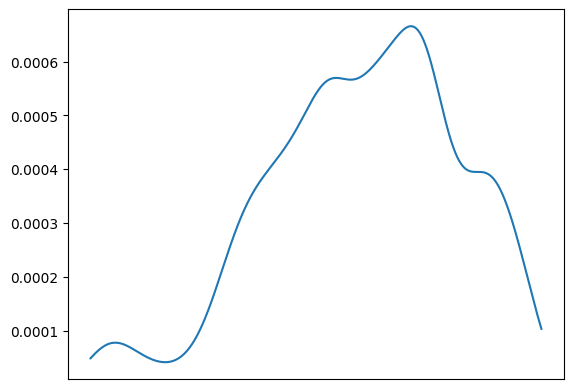

In [47]:
# plot E02000977 in MSOA_origin_PDFs_inverse
plt.plot(MSOA_origin_PDFs_inverse.loc['E02000977'])
# hide the x-axis and its label
plt.xticks([])
plt.show()

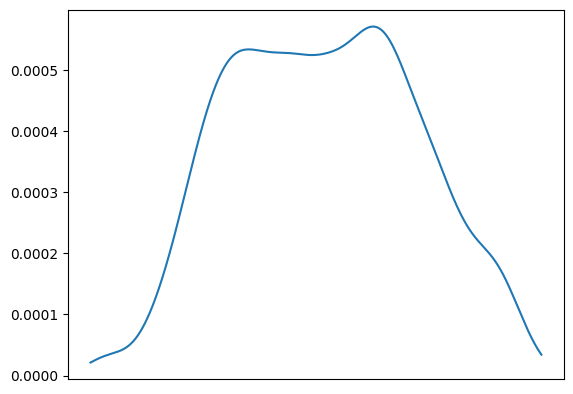

In [21]:
# plot E02000524
plt.plot(MSOA_origin_PDFs_inverse.loc['E02000524'])
plt.xticks([])
plt.show()

In [63]:
# save all unique values of MSOA_origin_PDFs to a list
MSOA_origin_PDFs_inverse_list = MSOA_origin_PDFs_inverse.index.tolist()
# create a data matrix with 983 rows and 983 columns, filled with 0.00, and the columns and rows are the MSOA_origin_PDFs_list
MSOA_origin_PDFs_inverse_matrix = pd.DataFrame(np.zeros((len(MSOA_origin_PDFs_inverse_list), len(MSOA_origin_PDFs_inverse_list))), columns=MSOA_origin_PDFs_inverse_list, index=MSOA_origin_PDFs_inverse_list)
MSOA_origin_PDFs_inverse_matrix

,E02000977,E02000972,E02000001,E02000524,E02000476,E02000726,E02006801,E02006929,E02000193,E02000606,...,E02000373,E02000171,E02000352,E02000345,E02006918,E02000734,E02000414,E02000432,E02000380,E02000347
E02000977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E02000972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E02000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E02000524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E02000476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E02000734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E02000414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E02000432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E02000380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# test the hellinger distance between E02000977 and E02000001
a=MSOA_origin_PDFs_inverse.loc['E02000977']
b=MSOA_origin_PDFs_inverse.loc['E02000001']
hellinger_distance = np.sqrt(np.sum((np.sqrt(a) - np.sqrt(b)) ** 2)) / np.sqrt(2)
hellinger_distance

0.10358864221226494

In [64]:
# for each value in the matrix, calculate the hellinger distance between the two PDF lists of these two MSOAs values
for i in MSOA_origin_PDFs_inverse_list:
    for j in MSOA_origin_PDFs_inverse_list:
        # calculate the hellinger distance between two PDF lists
        hellinger_distance = np.sqrt(np.sum((np.sqrt(MSOA_origin_PDFs_inverse.loc[i]) - np.sqrt(MSOA_origin_PDFs_inverse.loc[j])) ** 2) / np.sqrt(2))
        # fill the hellinger distance into the matrix
        MSOA_origin_PDFs_inverse_matrix.loc[i, j] = hellinger_distance
        
MSOA_origin_PDFs_inverse_matrix

,E02000977,E02000972,E02000001,E02000524,E02000476,E02000726,E02006801,E02006929,E02000193,E02000606,...,E02000373,E02000171,E02000352,E02000345,E02006918,E02000734,E02000414,E02000432,E02000380,E02000347
E02000977,0.000000,0.045157,0.089504,0.304849,0.171846,0.161169,0.109194,0.189099,0.069262,0.167993,...,0.257686,0.163197,0.218175,0.171428,0.178893,0.239157,0.119993,0.064680,0.208576,0.218317
E02000972,0.045157,0.000000,0.116059,0.316907,0.162015,0.148997,0.118062,0.185798,0.081720,0.159107,...,0.266896,0.168437,0.223313,0.189440,0.178863,0.236911,0.146182,0.078371,0.186032,0.230229
E02000001,0.089504,0.116059,0.000000,0.227373,0.137652,0.131611,0.084162,0.149242,0.078850,0.138728,...,0.181345,0.108546,0.162389,0.101336,0.127319,0.179011,0.055239,0.063744,0.195905,0.140315
E02000524,0.304849,0.316907,0.227373,0.000000,0.233320,0.216371,0.254567,0.236079,0.282045,0.248190,...,0.089968,0.170845,0.209785,0.186885,0.211555,0.154747,0.201244,0.269809,0.268984,0.142991
E02000476,0.171846,0.162015,0.137652,0.233320,0.000000,0.083598,0.105539,0.064649,0.125998,0.034768,...,0.160038,0.122955,0.117937,0.147893,0.070799,0.117045,0.170127,0.133249,0.104112,0.129170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E02000734,0.239157,0.236911,0.179011,0.154747,0.117045,0.117845,0.172892,0.119219,0.201752,0.131072,...,0.094019,0.125436,0.155461,0.153513,0.117892,0.000000,0.185800,0.195594,0.153507,0.102468
E02000414,0.119993,0.146182,0.055239,0.201244,0.170127,0.151096,0.121528,0.179563,0.124509,0.177237,...,0.173788,0.107462,0.185365,0.104998,0.155059,0.185800,0.000000,0.101720,0.223004,0.143675
E02000432,0.064680,0.078371,0.063744,0.269809,0.133249,0.125322,0.060661,0.138372,0.040299,0.129706,...,0.218329,0.145915,0.172342,0.118543,0.125429,0.195594,0.101720,0.000000,0.190696,0.166985
E02000380,0.208576,0.186032,0.195905,0.268984,0.104112,0.109160,0.185107,0.158156,0.185576,0.107715,...,0.207439,0.143852,0.187289,0.228465,0.156919,0.153507,0.223004,0.190696,0.000000,0.208464


In [65]:
MSOA_origin_PDFs_inverse_matrix.to_csv('output/MSOA_origin_PDFs_inverse_weekend_matrix.csv')

In [66]:
MSOA_origin_PDFs_inverse_matrix = pd.read_csv('output/MSOA_origin_PDFs_inverse_weekend_matrix.csv', index_col=0)

In [67]:
# add a new column 'similarity_index' to the msoa_shp
msoa_shp['similarity_index'] = 0.00
# add a new column 'adjacent_ele_list' to the msoa_shp
msoa_shp['adjacent_ele_list'] = ""
msoa_shp['adjacent_2level_list'] = ""

# for each row in the msoa_shp, calculate all adjacent shapefile elements and calculate the average similarity index based on the MSOA_origin_PDFs_matrix
for index, row in msoa_shp.iterrows():
    # get tjhe MSOA code of the current row
    MSOAcode = row['MSOA11CD']
    # get the adjacent shapefile elements of the current row, which means whichever share the boundary with the current row
    adjacent = msoa_shp[msoa_shp.geometry.intersects(row['geometry'])]
    # for each element in the adjacent shapefile elements, get all the adjacent shapefile elements of them, which means the 2-level adjacent elements
    # also, the results should not contain the elements already in the adjacent shapefile elements, also exclude the current row itself
    adjacent_2level = msoa_shp[msoa_shp.geometry.intersects(adjacent['geometry'].unary_union) & ~msoa_shp.geometry.intersects(row['geometry']) & ~msoa_shp['MSOA11CD'].isin(adjacent['MSOA11CD'])]
    
    # convert the 'MSOA11CD' column of the adjacent shapefile elements to a list and save it to the 'adjacent_ele_list' column of the current row
    msoa_shp.at[index, 'adjacent_ele_list'] = adjacent['MSOA11CD'].tolist()
    # convert the 'MSOA11CD' column of the 2-level adjacent shapefile elements to a list and save it to the 'adjacent_2level_list' column of the current row
    msoa_shp.at[index, 'adjacent_2level_list'] = adjacent_2level['MSOA11CD'].tolist()
    # for each adjacent shapefile element, calculate the similarity index based on the MSOA_origin_PDFs_matrix
    similarity_index_level1 = 0
    similarity_index_level2 = 0
    for index_adj, row_adj in adjacent.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level1 += MSOA_origin_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
        
    for index_adj, row_adj in adjacent_2level.iterrows():
        MSOAcode_adj = row_adj['MSOA11CD']
        similarity_index_level2 += MSOA_origin_PDFs_inverse_matrix.loc[MSOAcode, MSOAcode_adj]
    alpha_level1 = 1
    alpha_level2 = 0.5
    # calculate the average similarity index
    similarity_index = (similarity_index_level1 / len(adjacent)) * alpha_level1 + (similarity_index_level2 / len(adjacent_2level)) * alpha_level2
    # fill the similarity index into the msoa_shp
    msoa_shp.loc[index, 'similarity_index'] = similarity_index
    
msoa_shp.sample(4)

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,similarity_index,adjacent_ele_list,adjacent_2level_list
318,E02000329,Greenwich 017,E09000011,Greenwich,E12000007,London,6180,6169,11,35.1,2364,2.6,"POLYGON ((545580.375 177422.344, 545651.375 17...",0.134553,"[E02000082, E02000319, E02000321, E02000323, E...","[E02000073, E02000077, E02000080, E02000085, E..."
774,E02000804,Richmond upon Thames 021,E09000027,Richmond upon Thames,E12000007,London,7106,7013,93,19.0,3148,2.2,"POLYGON ((516019.202 171533.200, 515992.050 17...",0.141754,"[E02000801, E02000802, E02000804, E02000805, E...","[E02000553, E02000598, E02000601, E02000606, E..."
782,E02000813,Southwark 007,E09000028,Southwark,E12000007,London,8591,8561,30,96.1,3746,2.3,"POLYGON ((535769.939 179180.594, 535850.115 17...",0.139370,"[E02000653, E02000807, E02000810, E02000813, E...","[E02000654, E02000655, E02000809, E02000812, E..."
156,E02000161,Bromley 035,E09000006,Bromley,E12000007,London,8410,8378,32,48.9,3369,2.5,"POLYGON ((545600.743 165674.450, 545702.779 16...",0.106643,"[E02000154, E02000157, E02000158, E02000161, E...","[E02000145, E02000148, E02000149, E02000151, E..."
